Import necessary modules

In [1]:
import sys
sys.path.append("/net/server/homes/sep/ettore/research/packages/acoustic_isotropic_operators/test/lib/python/")
import genericIO
import SepVector
import Hypercube
import Acoustic_iso_double
import numpy as np
import time

Create wavelet and velocity model

In [2]:
!Wavelet n1=1001 d1=0.004 fund=10. tdelay=1. wavelet=ricker2 | Add scale=-1. > wlt.H

In [3]:
!Vel n1=560 d1=0.01 o1=0.0 n2=1904 d2=0.01 o2=0.0 n3=1 d3=0.01 o3=0.0 vc=2.0 | Pad beg1=5 end1=5 beg2=5 end2=5 > vel.H

Creating necessary variables for propagation


In [12]:
#Parameters for instantiating nonlinear operator
#First argument is just a dummy one since it mimics the name of the main program (i.e., we mimic sys.argv)
#vel = velocity model header file
#model = wavelet header file
#par = parameter file containing simulation information
args=["dummy arg","vel=vel.H","model=wlt.H","par=parPythonTest.p"]
modelDouble, dataDouble, velDouble, parObject, sourcesVector, receiversVector = Acoustic_iso_double.nonlinearOpInitDouble(args)
#Printing parameter file for reference
!cat parPythonTest.p


nts=1001
dts=0.004
sub=4
nz=570
nx=1914
zPadMinus=100
zPadPlus=110
xPadMinus=100
xPadPlus=104
dz=0.01
dx=0.01
fMax=16
zSource=10
xSource=850
nShot=50
spacingShots=1
depthReceiver=10
nReceiver=1700
dReceiver=1
oReceiver=1
saveWavefield=0
wavefieldShotNumber=0
blockSize=16
fat=5
nGpu=8


Create simulation object

In [13]:
propagator=Acoustic_iso_double.nonlinearPropShotsGpu(modelDouble,dataDouble,velDouble,parObject,sourcesVector,receiversVector)


In [19]:
t0 = time.time()
propagator.forward(False, modelDouble, dataDouble);
t1 = time.time()
print("Elapsed time = ",t1-t0," seconds")

Elapsed time =  8.405357599258423  seconds


Plotting data

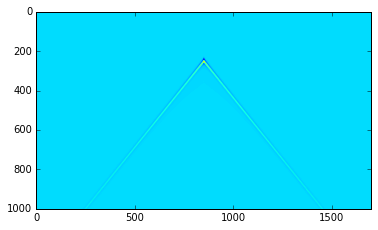

In [17]:
%matplotlib inline  
import matplotlib.pyplot as plt
data = np.reshape(dataDouble.getNdArray()[0,:,:],(1700,1001))
plt.imshow(data.T);

Dot-product test of propagator operator

In [18]:
propagator.dotTest(True)

Dot-product test of forward and adjoint operators
-------------------------------------------------
Applying forward operator add=False
	Runs in: 6.697424650192261 seconds
Applying adjoint operator add=False
	Runs in: 5.30126428604126 seconds
Dot products add=False: domain=-0.0012325319628822737 range=-0.0012325319628821996 
Absolute error: 7.41594285980085e-17
Relative error: 6.016836141481579e-14 


Applying forward operator add=True
	Runs in: 4.960516929626465 seconds
Applying adjoint operator add=True
	Runs in: 4.128411054611206 seconds
Dot products add=True: domain=-0.0024650639257645457 range=-0.0024650639257644495 
Absolute error: 9.627715291671279e-17
Relative error: 3.90566556552305e-14 

-------------------------------------------------
